# Funciones extras

In [ ]:
# prompt: ayudame a copiar /content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Pruebas_10_especies y sus subcarpetas a mi instancia

#!cp -r /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton/Datasets/ /content/
#!cp -r  /content/Datasets /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton/
#!cp -r /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton/planktonnet /content/
!cp /content/drive/Shareddrives/Proyecto\ Terminal\ ANN\ Plankton/Plankton/Datasets/dataset10.zip /content/


In [ ]:
!unzip /content/dataset10.zip

Streaming output truncated to the last 5000 lines.
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_060_001013_03585.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_060_003154_00794.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_060_005303_00861.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_060_005303_01494.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_003302_05539.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_005515_05388.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_120738_00617.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_120738_04276.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_122847_05055.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_181011_00061.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_181011_01133.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_2008_072_183155_00356.png  
 extracting: dataset10/val/Cylindrotheca/IFCB1_20

In [ ]:
import gc

del model
gc.collect()

4

In [ ]:
!rm -r /content/Datasets/PlanktonDivided/train/Ephemera/.ipynb_checkpoints

rm: cannot remove '/content/Datasets/PlanktonDivided/train/Ephemera/.ipynb_checkpoints': No such file or directory


In [ ]:
# prompt: quiero comprimir la carpeta /content/Datasets en zip

!zip -r /content/Datasets.zip /content/Datasets


Streaming output truncated to the last 5000 lines.
updating: content/Datasets/PlanktonC/train/ceratium/page_36_image_1.jpg (deflated 2%)
updating: content/Datasets/PlanktonC/train/ceratium/page_43_image_11.jpg (deflated 58%)
updating: content/Datasets/PlanktonC/train/ceratium/page_41_image_14.jpg (deflated 56%)
updating: content/Datasets/PlanktonC/train/ceratium/page_35_image_9.jpg (deflated 3%)
updating: content/Datasets/PlanktonC/train/ceratium/page_12_image_6.jpg (deflated 2%)
updating: content/Datasets/PlanktonC/train/ceratium/page_11_image_11.jpg (deflated 1%)
updating: content/Datasets/PlanktonC/train/ceratium/page_10_image_14.jpg (deflated 2%)
updating: content/Datasets/PlanktonC/train/ceratium/page_20_image_5.jpg (deflated 3%)
updating: content/Datasets/PlanktonC/train/ceratium/page_41_image_9.jpg (deflated 58%)
updating: content/Datasets/PlanktonC/train/ceratium/page_3_image_4.jpg (deflated 1%)
updating: content/Datasets/PlanktonC/train/ceratium/page_17_image_15.jpg (deflated 

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Exploración inicial de los datos

In [ ]:
import os
import pandas as pd

def contar_elementos_por_subcarpeta(directorio):
    elementos_por_subcarpeta = {}

    for ruta_actual, carpetas, archivos in os.walk(directorio):
        subcarpeta = os.path.relpath(ruta_actual, directorio)
        cantidad_elementos = len(carpetas) + len(archivos)

        elementos_por_subcarpeta[subcarpeta] = cantidad_elementos

    return elementos_por_subcarpeta

def comparar_varios_directorios(directorios):
    datos_por_directorio = {}

    # Contar elementos en cada subcarpeta de todos los directorios
    for directorio in directorios:
        datos_por_directorio[directorio] = contar_elementos_por_subcarpeta(directorio)

    # Crear un DataFrame para comparar las subcarpetas
    df = pd.DataFrame()
    for directorio, datos in datos_por_directorio.items():
        subcarpetas = list(datos.keys())
        elementos = list(datos.values())

        df_actual = pd.DataFrame({
            'Subcarpeta': subcarpetas,
            f'Elementos_{os.path.basename(directorio)}': elementos
        })

        if df.empty:
            df = df_actual
        else:
            df = pd.merge(df, df_actual, on='Subcarpeta', how='outer')

    return df

# Lista de directorios que deseas comparar
directorios = [
    '/content/dataset10/train',
    '/content/dataset10/val',
    '/content/dataset10/test'
]

# Comparar los directorios y obtener el DataFrame
df_comparacion = comparar_varios_directorios(directorios)

# Imprimir el DataFrame
print(df_comparacion)


       Subcarpeta  Elementos_train  Elementos_val  Elementos_test
0               .               10             10              10
1        Ephemera              450            100             102
2   Coscinodiscus              793            178             179
3   Cylindrotheca            15086           3408            3408
4        Ceratium             1065            230             233
5       Dinobryon             5423           1207            1211
6      Delphineis              326             80              83
7    Cochlodinium               31             10              11
8       Dictyocha             1739            386             388
9        Akashiwo               60             12              14
10      Corethron             4608           1029            1024


In [ ]:
import os
import shutil

# Directorios de origen y destino
source_dirs = [
    '/content/Datasets/PlanktonDivided',
    '/content/Datasets/planktonnet'
]
destination_dir = '/content/Datasets/PlanktonC'

# Subcarpetas principales (train, val, test)
subfolders = ['train', 'val', 'test']

# Crear la función para copiar archivos con nombres de carpetas normalizados
def copy_files_normalized(src, dst):
    for root, _, files in os.walk(src):
        # Obtener la ruta relativa y normalizar la carpeta a minúsculas
        relative_path = os.path.relpath(root, src).lower()
        destination_path = os.path.join(dst, relative_path)

        # Crear las carpetas necesarias en el destino
        os.makedirs(destination_path, exist_ok=True)

        # Copiar los archivos
        for file in files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(destination_path, file)

            # Si el archivo ya existe, renombrarlo en el destino
            if os.path.exists(dst_file):
                base, extension = os.path.splitext(dst_file)
                counter = 1
                while os.path.exists(dst_file):
                    dst_file = f"{base}_{counter}{extension}"
                    counter += 1

            shutil.copy2(src_file, dst_file)

# Copiar archivos de las dos carpetas fuente a la carpeta destino
for source_dir in source_dirs:
    for subfolder in subfolders:
        source_subfolder_path = os.path.join(source_dir, subfolder)
        destination_subfolder_path = os.path.join(destination_dir, subfolder)
        copy_files_normalized(source_subfolder_path, destination_subfolder_path)

print("Los conjuntos de datos han sido combinados en la carpeta PlanktonC con nombres de carpetas normalizados.")


Los conjuntos de datos han sido combinados en la carpeta PlanktonC con nombres de carpetas normalizados.


In [ ]:
df_comparacion

Subcarpeta  Elementos_train  Elementos_val  Elementos_test
0               .               10             10              10
1        ceratium              526            112             115
2        ephemera               27              7               8
3        akashiwo               60             12              14
4       dinobryon              424             90              93
5    cochlodinium               28              9               9
6   coscinodiscus              336             72              74
7       corethron              351             75              77
8   cylindrotheca             1540            329             333
9      delphineis              107             22              25
10      dictyocha              172             36              39

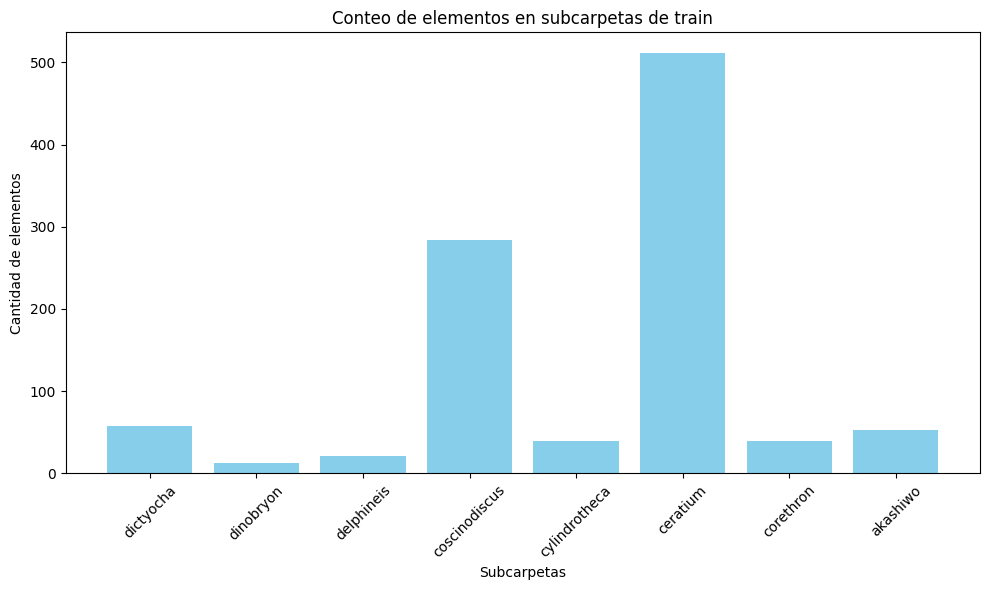

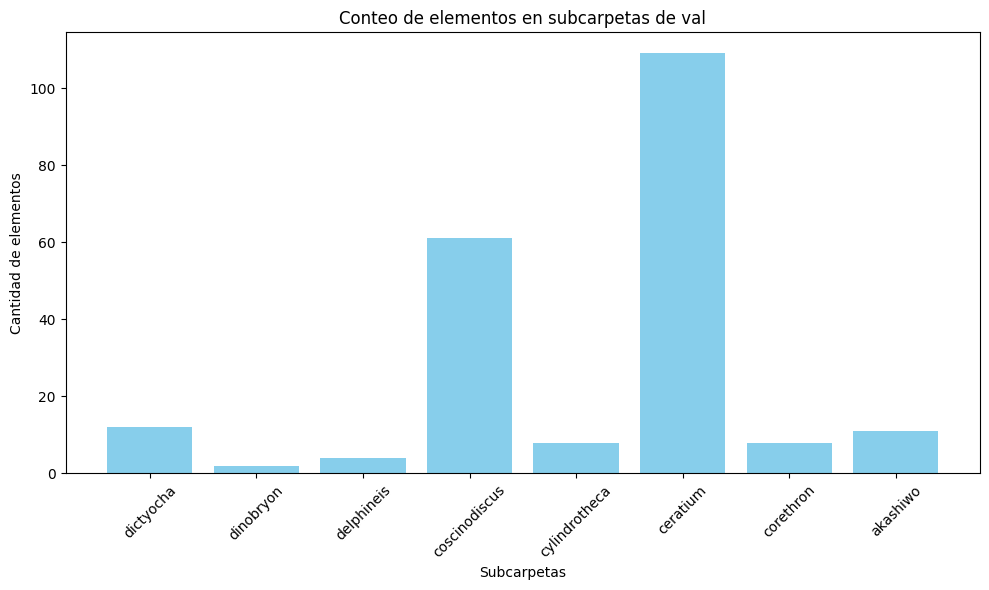

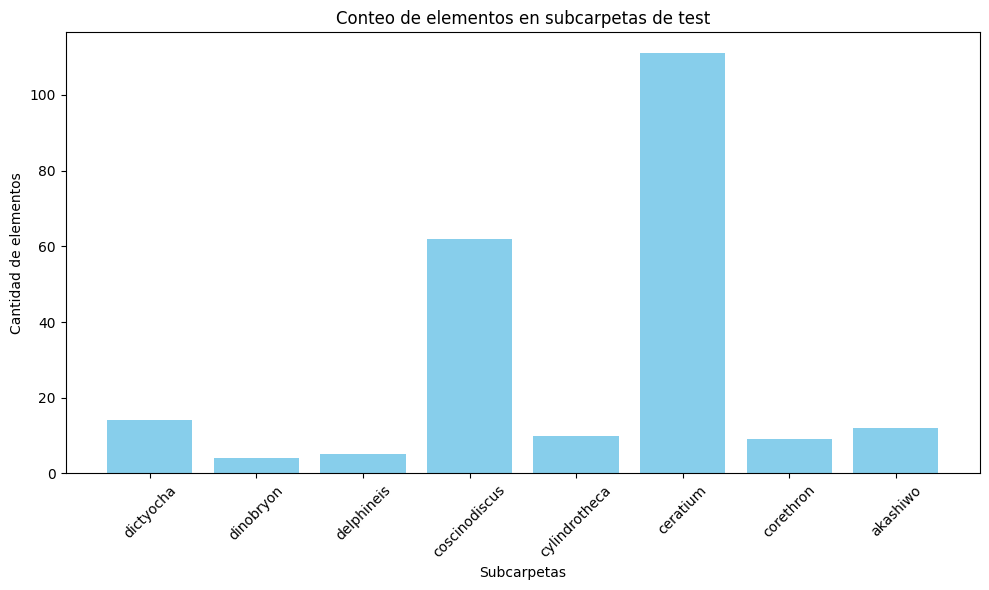

In [ ]:
import os
import matplotlib.pyplot as plt

# Directorios principales
base_dir = '/content/planktonnet'
categories = ['train', 'val', 'test']

# Función para contar archivos en las subcarpetas y graficar
def plot_folder_counts(folder_path, title):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    counts = [len(os.listdir(os.path.join(folder_path, subfolder))) for subfolder in subfolders]

    plt.figure(figsize=(10, 6))
    plt.bar(subfolders, counts, color='skyblue')
    plt.title(f'Conteo de elementos en subcarpetas de {title}')
    plt.xlabel('Subcarpetas')
    plt.ylabel('Cantidad de elementos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generar las gráficas para train, val y test
for category in categories:
    plot_folder_counts(os.path.join(base_dir, category), category)


In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define directorios base
base_dir = '/content/Datasets/planktonnet'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Crear carpetas si no existen
for dir_path in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Obtener clases de la carpeta base
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Dividir datos y mover a carpetas correspondientes
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Comprobar si la clase tiene imágenes
    if len(images) == 0:
        print(f'No hay imágenes en la clase {class_name}, omitiendo esta clase.')
        continue

    # Dividir en entrenamiento, validación y prueba (80%, 10%, 10%)
    train_images, temp_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    for image_set, target_dir in zip([train_images, val_images, test_images],
                                     [train_dir, val_dir, test_dir]):
        class_target_dir = os.path.join(target_dir, class_name)
        if not os.path.exists(class_target_dir):
            os.makedirs(class_target_dir)
        for image in image_set:
            src_path = os.path.join(class_dir, image)
            dst_path = os.path.join(class_target_dir, image)
            shutil.copy(src_path, dst_path)

No hay imágenes en la clase val, omitiendo esta clase.
No hay imágenes en la clase train, omitiendo esta clase.
No hay imágenes en la clase ephemera, omitiendo esta clase.
No hay imágenes en la clase test, omitiendo esta clase.
No hay imágenes en la clase cochlodinium, omitiendo esta clase.


In [ ]:
!rm -r /content/Datasets/planktonnet/ephemera

rm: cannot remove '/content/Datasets/planktonnet/ephemera': No such file or directory


In [ ]:
import os
import shutil
import random

# Directorio principal
base_dir = '/content/Datasets/PlanktonDivided'

# Subcarpetas principales (train, val, test)
categories = ['train', 'val', 'test']
subfolders = [f.name for f in os.scandir(os.path.join(base_dir, 'train')) if f.is_dir()]

# Proporciones
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Función para redistribuir archivos
def redistribute_files(subfolder_name):
    train_dir = os.path.join(base_dir, 'train', subfolder_name)
    val_dir = os.path.join(base_dir, 'val', subfolder_name)
    test_dir = os.path.join(base_dir, 'test', subfolder_name)

    # Crear directorios si no existen
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Recolectar todos los archivos de las carpetas de train, val y test
    all_files = []
    for category in categories:
        folder_path = os.path.join(base_dir, category, subfolder_name)
        files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)]
        all_files.extend(files)

    # Mezclar los archivos de manera aleatoria
    random.shuffle(all_files)

    # Calcular el número de archivos para cada conjunto
    total_files = len(all_files)
    train_size = int(total_files * train_ratio)
    val_size = int(total_files * val_ratio)
    test_size = total_files - train_size - val_size

    # Mover archivos a train, val y test
    for i, file in enumerate(all_files):
        if i < train_size:
            shutil.move(file, os.path.join(train_dir, os.path.basename(file)))
        elif i < train_size + val_size:
            shutil.move(file, os.path.join(val_dir, os.path.basename(file)))
        else:
            shutil.move(file, os.path.join(test_dir, os.path.basename(file)))

# Aplicar la redistribución a cada subcarpeta
for subfolder in subfolders:
    redistribute_files(subfolder)

print("Archivos redistribuidos en una proporción 70/15/15.")


Archivos redistribuidos en una proporción 70/15/15.


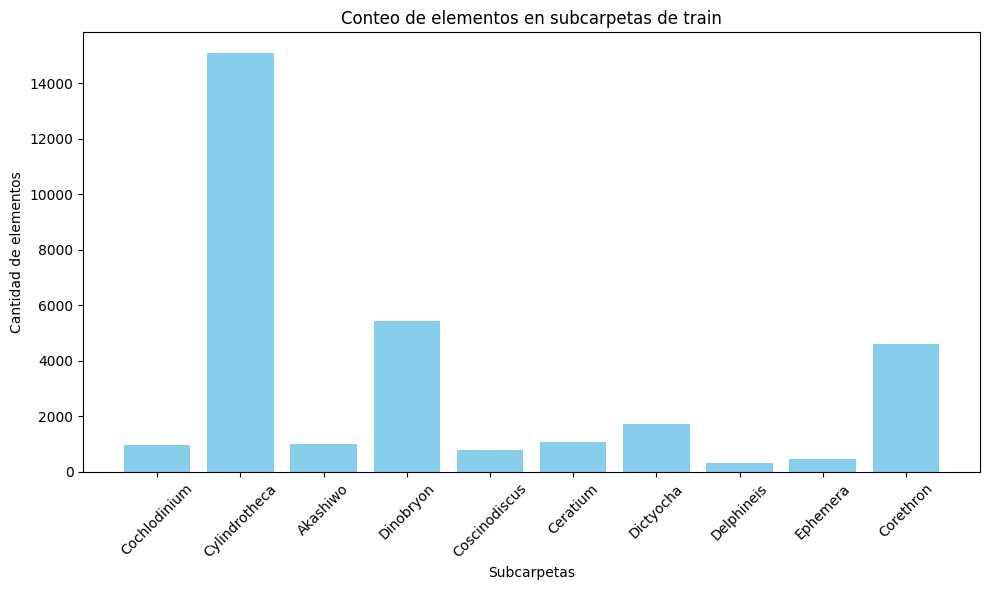

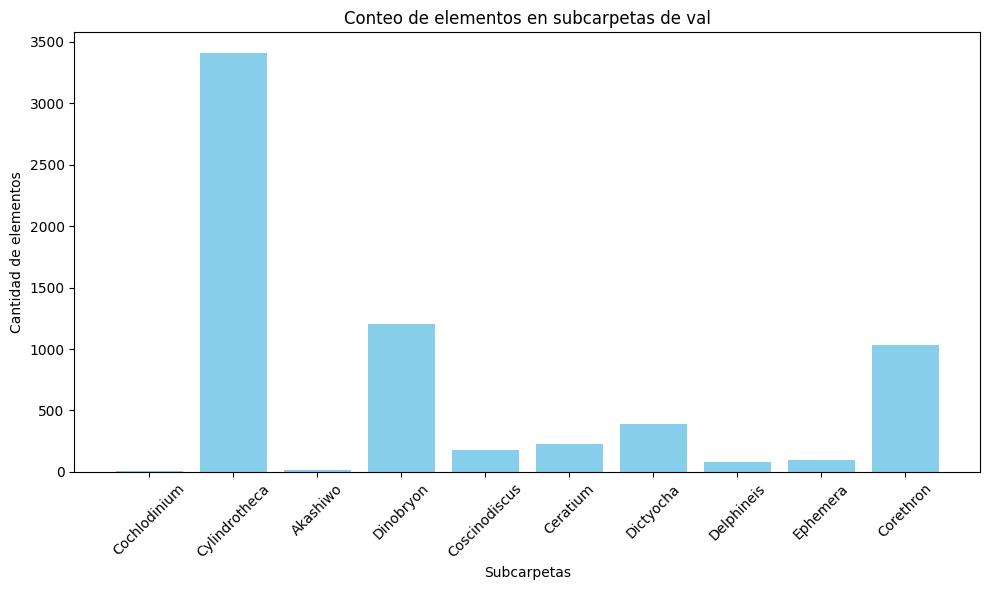

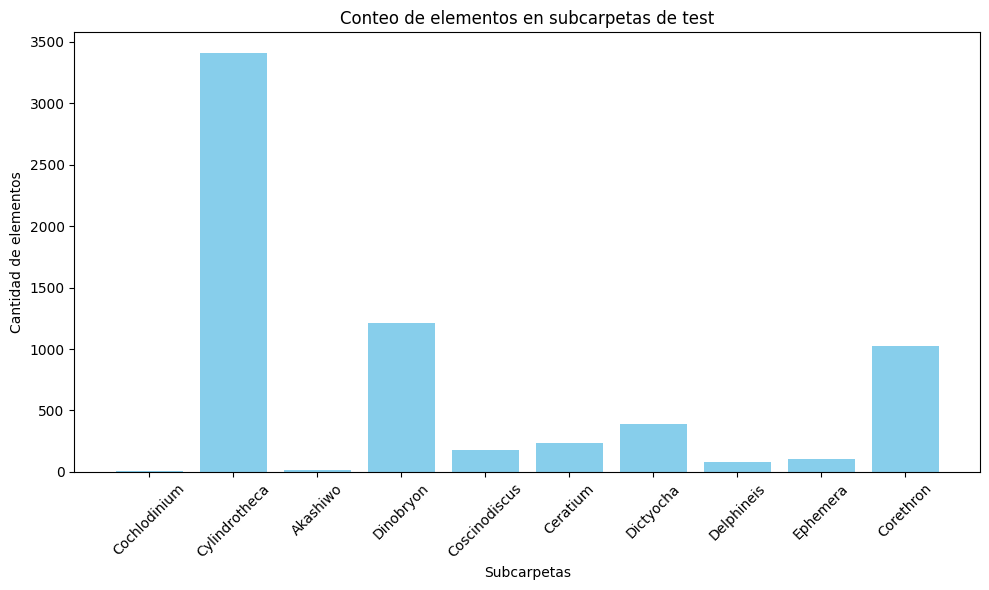

In [ ]:
import os
import matplotlib.pyplot as plt

# Directorios principales
base_dir = '/content/dataset10'
categories = ['train', 'val', 'test']

# Función para contar archivos en las subcarpetas y graficar
def plot_folder_counts(folder_path, title):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    counts = [len(os.listdir(os.path.join(folder_path, subfolder))) for subfolder in subfolders]

    plt.figure(figsize=(10, 6))
    plt.bar(subfolders, counts, color='skyblue')
    plt.title(f'Conteo de elementos en subcarpetas de {title}')
    plt.xlabel('Subcarpetas')
    plt.ylabel('Cantidad de elementos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generar las gráficas para train, val y test
for category in categories:
    plot_folder_counts(os.path.join(base_dir, category), category)

In [ ]:
import os
import shutil

# Directorios de origen y destino
source_dirs = [
    '/content/Datasets/PlanktonDivided',
    '/content/Datasets/planktonnet'
]
destination_dir = '/content/Datasets/PlanktonC'

# Subcarpetas principales (train, val, test)
subfolders = ['train', 'val', 'test']

# Crear la función para copiar archivos
def copy_files(src, dst):
    for root, _, files in os.walk(src):
        # Obtener la ruta relativa y construir la ruta de destino correspondiente
        relative_path = os.path.relpath(root, src)
        destination_path = os.path.join(dst, relative_path)

        # Crear las carpetas necesarias en el destino
        os.makedirs(destination_path, exist_ok=True)

        # Copiar los archivos
        for file in files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(destination_path, file)

            # Si el archivo ya existe, renombrarlo en el destino
            if os.path.exists(dst_file):
                base, extension = os.path.splitext(dst_file)
                counter = 1
                while os.path.exists(dst_file):
                    dst_file = f"{base}_{counter}{extension}"
                    counter += 1

            shutil.copy2(src_file, dst_file)

# Copiar archivos de las dos carpetas fuente a la carpeta destino
for source_dir in source_dirs:
    for subfolder in subfolders:
        source_subfolder_path = os.path.join(source_dir, subfolder)
        destination_subfolder_path = os.path.join(destination_dir, subfolder)
        copy_files(source_subfolder_path, destination_subfolder_path)

print("Los conjuntos de datos han sido combinados en la carpeta PlanktonC.")


Los conjuntos de datos han sido combinados en la carpeta PlanktonC.


# Preprocesado de datos

In [ ]:
#Se eliminan las carpetas vacías

import os

def eliminar_carpetas_vacias(directorio):
    # Recorre los directorios de manera recursiva desde el más profundo al más superficial
    for root, dirs, files in os.walk(directorio, topdown=False):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            # Si el directorio está vacío, lo eliminamos
            if not os.listdir(dir_path):
                print(f"Eliminando carpeta vacía: {dir_path}")
                os.rmdir(dir_path)

# Ruta del directorio donde deseas buscar y eliminar carpetas vacías
directorio = "C:/Users/angl_/OneDrive/Escritorio/Datasets/2014"

eliminar_carpetas_vacias(directorio)
print("Carpetas vacías eliminadas.")


Carpetas vacías eliminadas.


In [ ]:
#Dentro de las carpetas existen archivos .tmb que sirven para las miniaturas pero que dan error en el procesado y creación de conjuntos

import os
from PIL import Image

def es_imagen_valida(ruta_imagen):
    try:
        with Image.open(ruta_imagen) as img:
            img.verify()  # Verifica que la imagen no esté corrupta
        return True
    except (IOError, SyntaxError) as e:
        return False

def eliminar_imagenes_corruptas(directorio):
    for root, dirs, files in os.walk(directorio):
        for file in files:
            ruta_imagen = os.path.join(root, file)
            if not es_imagen_valida(ruta_imagen):
                print(f"Eliminando imagen corrupta: {ruta_imagen}")
                os.remove(ruta_imagen)

# Ruta del directorio principal
directorio = "C:/Users/angl_/OneDrive/Escritorio/Datasets/Plankton - Copy"

eliminar_imagenes_corruptas(directorio)
print("Proceso completado.")


Proceso completado.


In [ ]:
# Se divide el directorio en 3 carpetas para entrenamiento, validacion y prueba.

import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define directorios base
base_dir = '/content/data/endless_forams_20190914_165343'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Crear carpetas si no existen
for dir_path in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Obtener clases de la carpeta base
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Dividir datos y mover a carpetas correspondientes
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    # Comprobar si la clase tiene imágenes
    if len(images) == 0:
        print(f'No hay imágenes en la clase {class_name}, omitiendo esta clase.')
        continue

    # Dividir en entrenamiento, validación y prueba (70%, 15%, 15%)
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    for image_set, target_dir in zip([train_images, val_images, test_images],
                                     [train_dir, val_dir, test_dir]):
        class_target_dir = os.path.join(target_dir, class_name)
        if not os.path.exists(class_target_dir):
            os.makedirs(class_target_dir)
        for image in image_set:
            src_path = os.path.join(class_dir, image)
            dst_path = os.path.join(class_target_dir, image)
            shutil.copy(src_path, dst_path)

# Entrenamiento de modelos

## Arquitecturas

### Inceptionv3

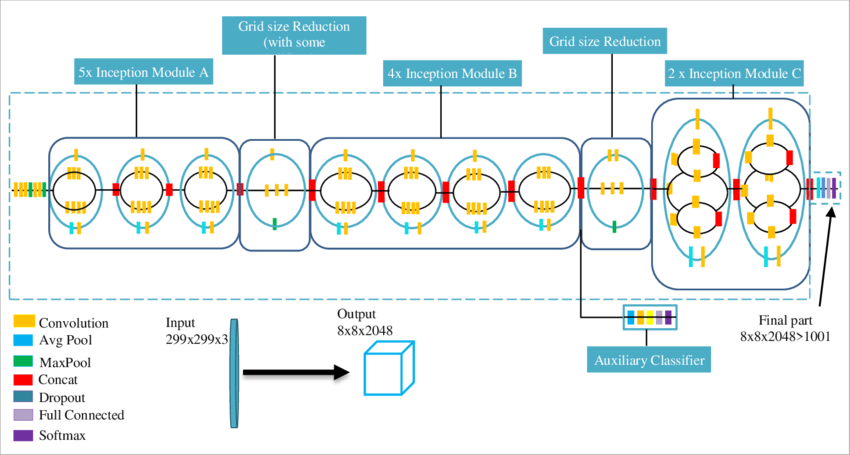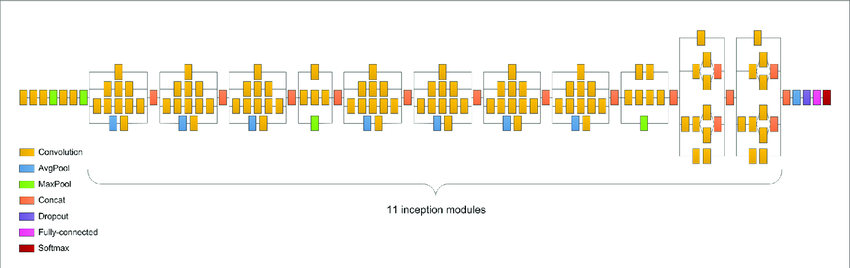

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Cargar el modelo InceptionV3 con pesos preentrenados en ImageNet
model = InceptionV3(weights='imagenet')

model.summary()

# Ver cuántas capas tiene el modelo
num_layers = len(model.layers)
print(f"El modelo tiene {num_layers} capas.")

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_970 (Conv2D)       │ (None, 149, 149, 32)   │            864 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_970   │ (None, 149, 149, 32)   │             96 │ conv2d_970[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_970            │ (None, 149, 149, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_971 (Conv2D)       │ (None, 147, 147, 32)   │          9,216 │ activation_970[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_971   │ (None, 147, 147, 32)   │             96 │ conv2d_971[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_971            │ (None, 147, 147, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_972 (Conv2D)       │ (None, 147, 147, 64)   │         18,432 │ activation_971[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_972   │ (None, 147, 147, 64)   │            192 │ conv2d_972[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_972            │ (None, 147, 147, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_32          │ (None, 73, 73, 64)     │              0 │ activation_972[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_973 (Conv2D)       │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_973   │ (None, 73, 73, 80)     │            240 │ conv2d_973[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_973            │ (None, 73, 73, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_974 (Conv2D)  

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

El modelo tiene 313 capas.


### MobileNetV2

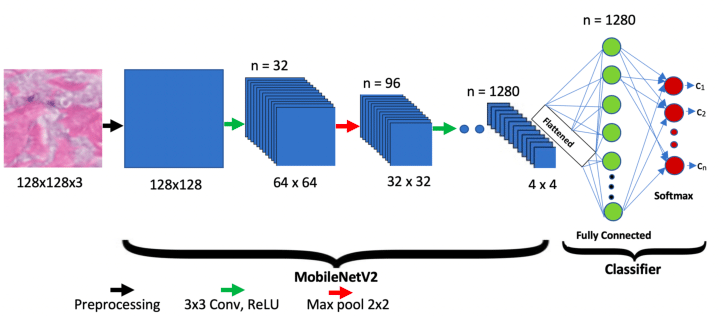

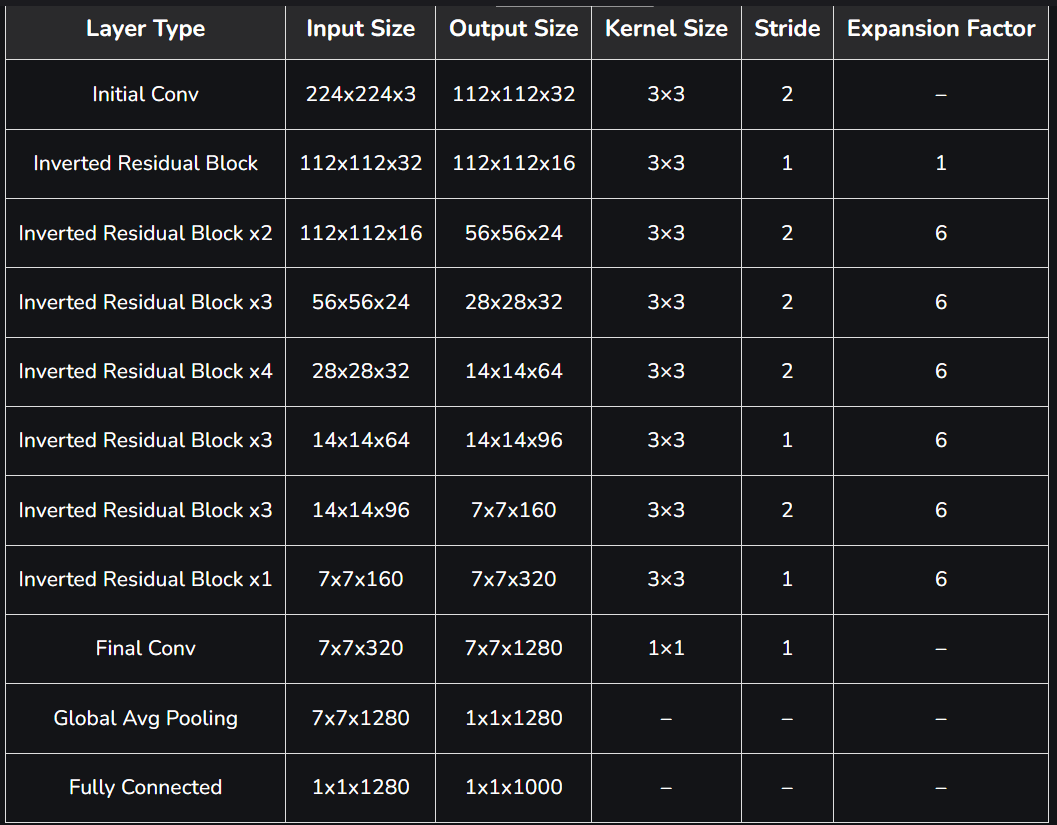

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Cargar el modelo InceptionV3 con pesos preentrenados en ImageNet
model = MobileNetV2(weights='imagenet')

# Ver la arquitectura del modelo
model.summary()

# Ver cuántas capas tiene el modelo
num_layers = len(model.layers)
print(f"El modelo tiene {num_layers} capas.")

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

El modelo tiene 156 capas.


### VGG16

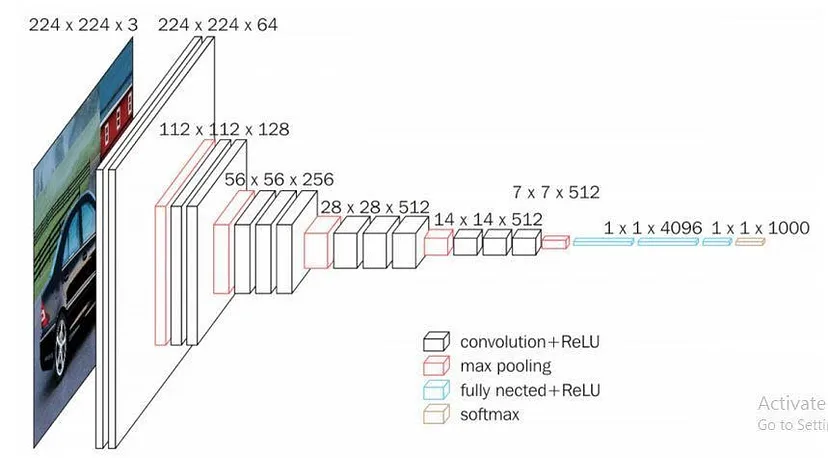

In [ ]:
from tensorflow.keras.applications import VGG16

# Cargar el modelo InceptionV3 con pesos preentrenados en ImageNet
model = VGG16(weights='imagenet')

# Ver la arquitectura del modelo
model.summary()

# Ver cuántas capas tiene el modelo
num_layers = len(model.layers)
print(f"El modelo tiene {num_layers} capas.")

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

El modelo tiene 23 capas.


### InceptionResNetv2

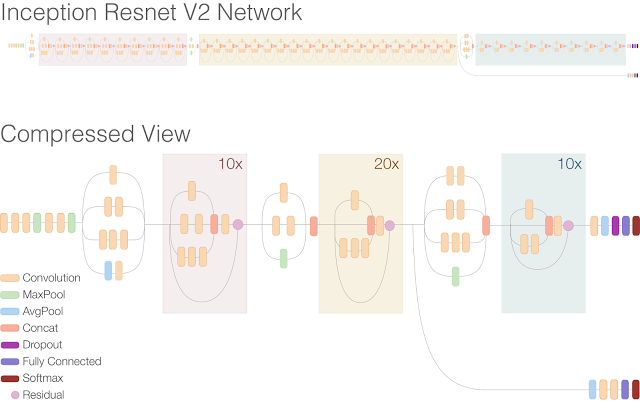

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

# Cargar el modelo InceptionV3 con pesos preentrenados en ImageNet
model = InceptionResNetV2(weights='imagenet')

# Ver la arquitectura del modelo
model.summary()

# Ver cuántas capas tiene el modelo
num_layers = len(model.layers)
print(f"El modelo tiene {num_layers} capas.")

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1064 (Conv2D)      │ (None, 149, 149, 32)   │            864 │ input_layer_17[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1064  │ (None, 149, 149, 32)   │             96 │ conv2d_1064[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1064           │ (None, 149, 149, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1065 (Conv2D)      │ (None, 147, 147, 32)   │          9,216 │ activation_1064[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1065  │ (None, 147, 147, 32)   │             96 │ conv2d_1065[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1065           │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1066 (Conv2D)      │ (None, 147, 147, 64)   │         18,432 │ activation_1065[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1066  │ (None, 147, 147, 64)   │            192 │ conv2d_1066[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1066           │ (None, 147, 147, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_36          │ (None, 73, 73, 64)     │              0 │ activation_1066[0][0]  │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1067 (Conv2D)      │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_36[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1067  │ (None, 73, 73, 80)     │            240 │ conv2d_1067[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1067           │ (None, 73, 73, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1068 (Conv2D) 

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

El modelo tiene 782 capas.


## Inception V3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
starting_epoch = 0
epochs_top_layers = 10
epochs_fine_tuning = 50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios base para cada conjunto de datos
train_dir = '/content/dataset10/train'
val_dir = '/content/dataset10/val'
test_dir = '/content/dataset10/test'

input_shape = (299, 299)
batch_size = 256

# Configuración del generador de datos con Data Augmentation extendido para el entrenamiento
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #horizontal_flip=True,
    #vertical_flip=True,
    fill_mode='nearest',
    #brightness_range=[0.8, 1.5],
)

# Generador para datos de entrenamiento
train_generator = datagen_train.flow_from_directory(
    directory=train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

# Generador para datos de validación
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

# Generador para datos de prueba
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)


Found 29581 images belonging to 10 classes.
Found 6640 images belonging to 10 classes.
Found 6653 images belonging to 10 classes.


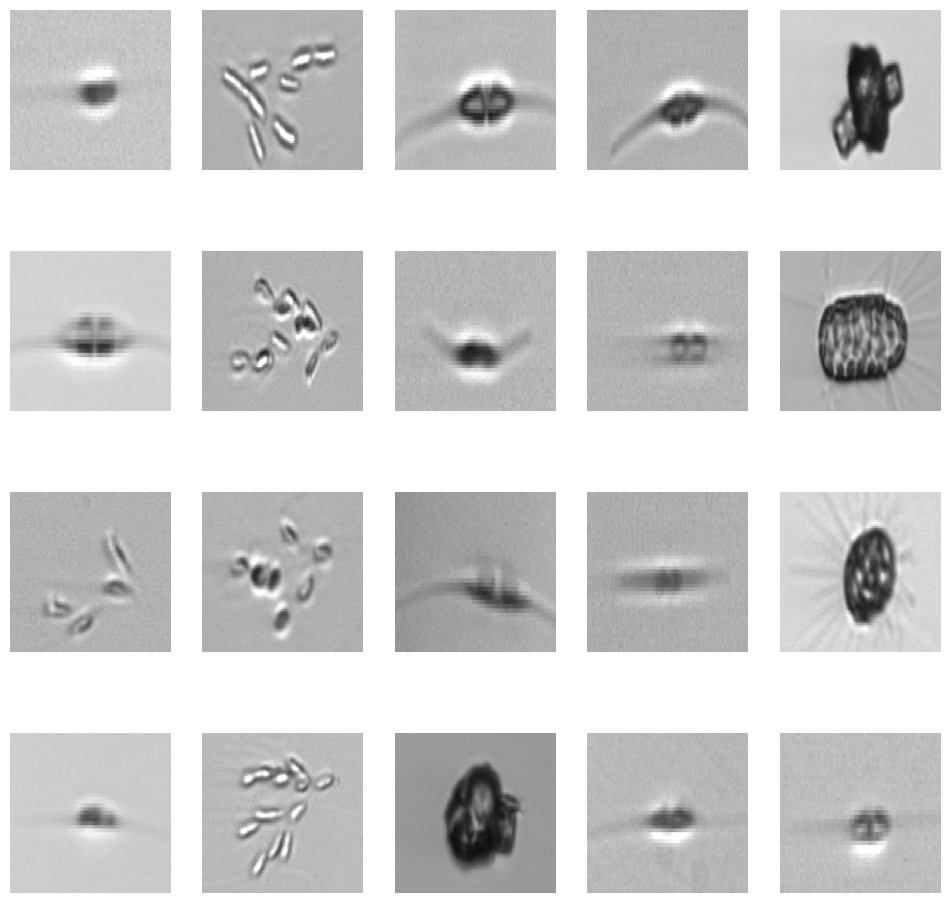

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Función para deshacer el preprocesamiento de InceptionV3
def undo_preprocess_input(x):
    # InceptionV3 usa la escala [-1, 1], por lo que la revertimos a [0, 255]
    x = (x + 1) * 127.5
    return np.clip(x, 0, 255).astype('uint8')

# Obtener un lote de imágenes (X son las imágenes, y son las etiquetas)
X_batch, y_batch = next(train_generator)

# Deshacer el preprocesamiento de las imágenes para visualización
X_batch_undo = undo_preprocess_input(X_batch)

# Configuración del número de imágenes a mostrar
num_images_to_show = 20  # Puedes ajustar esto a cualquier cantidad que prefieras
plt.figure(figsize=(12, 12))

for i in range(num_images_to_show):
    plt.subplot(4, 5, i + 1)
    img = X_batch_undo[i]  # Selecciona la i-ésima imagen del lote
    plt.imshow(img)
    plt.axis('off')  # Quita los ejes para una mejor visualización

plt.show()

In [ ]:
cls_train = train_generator.classes
cls_validate = validation_generator.classes
num_classes = train_generator.num_classes

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)
class_weight = dict(enumerate(class_weight))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

In [ ]:
def top_3_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
from tensorflow.keras.regularizers import l2
# Crear el modelo base de InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularización L2
x = Dropout(0.3)(x)  # Dropout del 30%


# '/content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Entrenamiento'

# Actualizar la capa de salida
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


#for layer in base_model.layers:
    #layer.trainable = False
for layer in model.layers[:249]:
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True

#for layer in base_model.layers:
  #if isinstance(layer ,tf.keras.layers.BatchNormalization):
      #layer.trainable=False

# Compilar el modelo
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_3_accuracy])

# Entrenar el modelo (solo las capas superiores)
history = model.fit(train_generator,
                    initial_epoch = starting_epoch,
                    epochs=epochs_top_layers+starting_epoch,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - categorical_accuracy: 0.8858 - loss: 2.1847 - top_3_accuracy: 0.9544 - val_categorical_accuracy: 0.9867 - val_loss: 1.3162 - val_top_3_accuracy: 0.9977 - learning_rate: 1.0000e-04
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 582ms/step - categorical_accuracy: 0.9894 - loss: 1.3346 - top_3_accuracy: 0.9980 - val_categorical_accuracy: 0.9920 - val_loss: 1.2158 - val_top_3_accuracy: 0.9976 - learning_rate: 1.0000e-04
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 579ms/step - categorical_accuracy: 0.9948 - loss: 1.1827 - top_3_accuracy: 0.9990 - val_categorical_accuracy: 0.9932 - val_loss: 1.1169 - val_top_3_accuracy: 0.9998 - learning_rate: 1.0000e-04
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 583ms/step - categorical_accuracy: 0.9972 - loss: 1.0815 - top_3_accuracy: 0.9996 - val_categorical_accuracy: 0.9946 - val_loss: 1.0285 - val_top_3_accuracy: 0.9998 - learning_rate: 1.0000e-04
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 581ms/step - categori

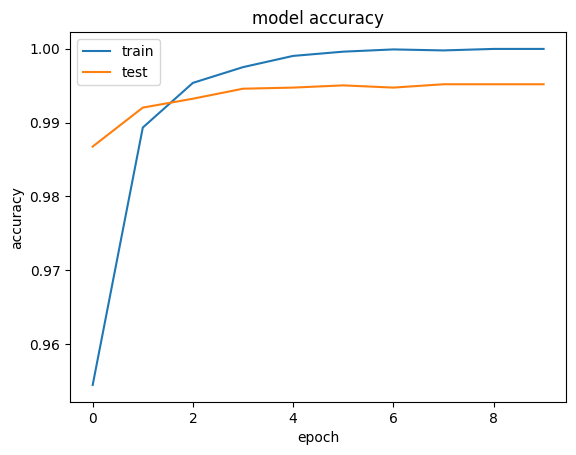

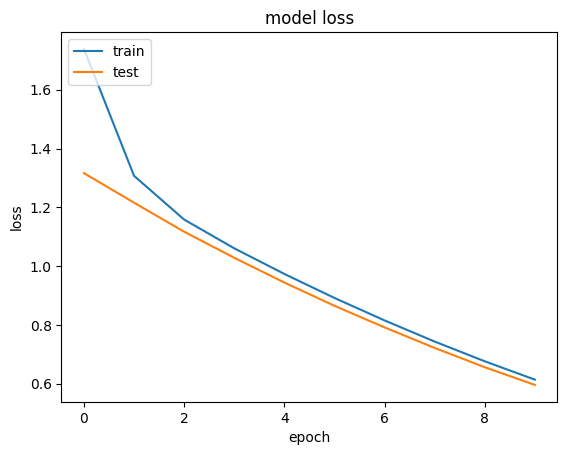

In [ ]:
plot_history(history)

In [ ]:
# prompt: quiero guardar mi modelo en .keras

model.save('InceptionV3_10.keras')


In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - categorical_accuracy: 0.9903 - loss: 0.6162 - top_3_accuracy: 0.9979
Test-set classification accuracy: 99.38%


In [ ]:
# prompt: quieor importar el modelo /content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Modelo Entrenado/InceptionV3_10.keras

from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo
model = load_model('/content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Modelo Entrenado/InceptionV3_10.keras', custom_objects={'top_3_accuracy': top_3_accuracy})


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Aquí ajusto los parámetros del early stopping y el reduce_lr para hacer el entrenamiento del resto de ls capas

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar todas las capas
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Definir el callback de TensorBoard
#tensorboard = TensorBoard(log_dir=f'logs/{datetime.now().strftime("%Y%m%d-%H%M%S")}', histogram_freq=1)

# Continuar entrenando el modelo (fine-tuning)
#fine_tuning_checkpoint = ModelCheckpoint('D:/Downloads/plankton_fine_tuned_best.hdf5', monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(train_generator,
                    initial_epoch=starting_epoch+epochs_top_layers,
                    epochs=starting_epoch+epochs_top_layers+epochs_fine_tuning,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 11/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 115s 776ms/step - categorical_accuracy: 1.0000 - loss: 0.5693 - val_categorical_accuracy: 0.9958 - val_loss: 0.5379 - learning_rate: 1.0000e-05
Epoch 12/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 579ms/step - categorical_accuracy: 1.0000 - loss: 0.5129 - val_categorical_accuracy: 0.9953 - val_loss: 0.4850 - learning_rate: 1.0000e-05
Epoch 13/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 583ms/step - categorical_accuracy: 1.0000 - loss: 0.4617 - val_categorical_accuracy: 0.9956 - val_loss: 0.4375 - learning_rate: 1.0000e-05
Epoch 14/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 583ms/step - categorical_accuracy: 1.0000 - loss: 0.4155 - val_categorical_accuracy: 0.9955 - val_loss: 0.3956 - learning_rate: 1.0000e-05
Epoch 15/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 72s 585ms/step - categorical_accuracy: 1.0000 - loss: 0.3740 - val_categorical_accuracy: 0.9959 - val_loss: 0.3557 - learning_rate: 1.0000e-05
Epoch 16/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 71s 583ms/step - categorical_accuracy:

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 651ms/step - categorical_accuracy: 0.9937 - loss: 0.0324
Test-set classification accuracy: 99.53%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Mostrar el reporte de clasificación
print(report)


26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 709ms/step
               precision    recall  f1-score   support

     Akashiwo       0.93      1.00      0.97        14
     Ceratium       0.96      0.98      0.97       233
 Cochlodinium       0.90      0.82      0.86        11
    Corethron       1.00      1.00      1.00      1024
Coscinodiscus       0.96      0.98      0.97       179
Cylindrotheca       1.00      1.00      1.00      3408
   Delphineis       0.98      0.98      0.98        83
    Dictyocha       1.00      0.99      0.99       388
    Dinobryon       1.00      1.00      1.00      1211
     Ephemera       1.00      0.99      1.00       102

     accuracy                           1.00      6653
    macro avg       0.97      0.97      0.97      6653
 weighted avg       1.00      1.00      1.00      6653



26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step


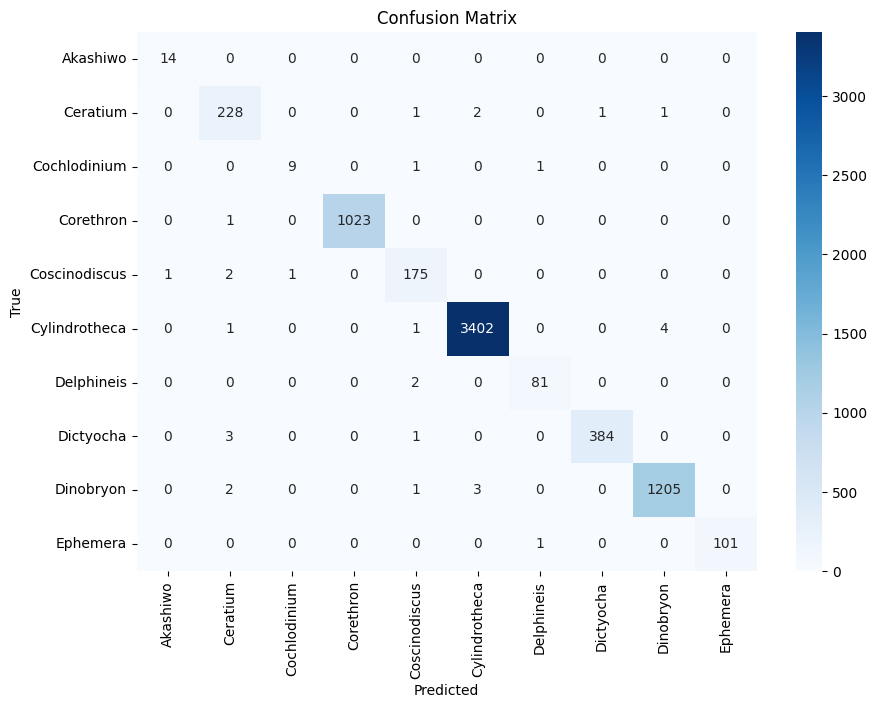

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Precisión para la carpeta 'akashiwo': 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 

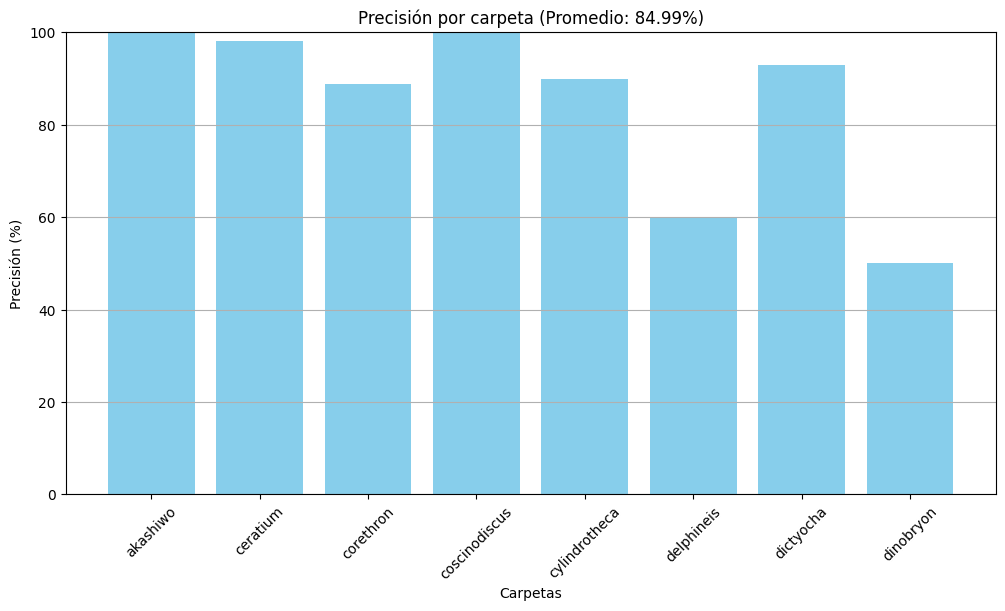

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
# model_path = '/ruta/a/tu/modelo.h5'
# model = tf.keras.models.load_model(model_path, custom_objects={'top_3_accuracy': top_3_accuracy})

# Ruta base de las carpetas de prueba
test_base_dir = '/content/planktonnet/test'

# Tamaño de las imágenes
target_size = (299, 299)

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Función para evaluar una carpeta de imágenes
def evaluate_folder(folder_path, true_label, model):
    if not os.path.exists(folder_path):
        print(f"Carpeta no encontrada: {folder_path}")
        return None  # O podrías devolver 0 o cualquier valor que indique que no se evaluó

    images = os.listdir(folder_path)
    correct_predictions = 0
    total_predictions = 0

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img_array = load_and_preprocess_image(img_path, target_size)
        predictions = model.predict(img_array)

        # Obtener los top 3 clases con mayor probabilidad
        top_3_indices = np.argsort(predictions[0])[::-1][:3]

        if true_label in top_3_indices:
            correct_predictions += 1
        total_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy

# Evaluar cada carpeta
carpetas_de_prueba = ['akashiwo', 'ceratium', 'cochlodinium', 'corethron', 'coscinodiscus', 'cylindrotheca', 'delphineis', 'dictyocha', 'dinobryon', 'ephemera']
true_labels = {
    'akashiwo': 0,
    'ceratium': 1,
    'cochlodinium': 2,
    'corethron': 3,
    'coscinodiscus': 4,
    'cylindrotheca': 5,
    'delphineis': 6,
    'dictyocha': 7,
    'dinobryon': 8,
    'ephemera': 9
}

precisiones = []

for carpeta in carpetas_de_prueba:
    carpeta_path = os.path.join(test_base_dir, carpeta)
    true_label = true_labels[carpeta]
    accuracy = evaluate_folder(carpeta_path, true_label, model)
    if accuracy is not None:
        precisiones.append((carpeta, accuracy))
        print(f"Precisión para la carpeta '{carpeta}': {accuracy:.2f}%")

# Calcular el promedio de las precisiones
accuracy_values = [item[1] for item in precisiones]
promedio = np.mean(accuracy_values)
print(f"Precisión promedio: {promedio:.2f}%")

# Graficar los resultados
carpetas = [item[0] for item in precisiones]

plt.figure(figsize=(12, 6))
plt.bar(carpetas, accuracy_values, color='skyblue')
plt.xlabel('Carpetas')
plt.ylabel('Precisión (%)')
plt.title(f'Precisión por carpeta (Promedio: {promedio:.2f}%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


## MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, mobilenet_v2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Usa preprocess_input desde el módulo de MobileNetV2
preprocess_input = mobilenet_v2.preprocess_input

In [ ]:
starting_epoch = 0
epochs_top_layers =10


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios base para cada conjunto de datos
train_dir = '/content/dataset10/train'
val_dir = '/content/dataset10/val'
test_dir = '/content/dataset10/test'

input_shape = (160,160)
batch_size = 256

# Configuración del generador de datos con Data Augmentation extendido para el entrenamiento
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
    #brightness_range=[0.8, 1.5],
)

# Generador para datos de entrenamiento
train_generator = datagen_train.flow_from_directory(
    directory=train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

# Generador para datos de validación
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

# Generador para datos de prueba
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)


Found 29581 images belonging to 10 classes.
Found 6640 images belonging to 10 classes.
Found 6653 images belonging to 10 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
num_classes = train_generator.num_classes

print(class_names)
print(num_classes)

['Akashiwo', 'Ceratium', 'Cochlodinium', 'Corethron', 'Coscinodiscus', 'Cylindrotheca', 'Delphineis', 'Dictyocha', 'Dinobryon', 'Ephemera']
10


In [ ]:
cls_train = train_generator.classes
cls_validate = validation_generator.classes

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)
class_weight = dict(enumerate(class_weight))

In [ ]:
def top_3_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(160,160,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularización L2
x = Dropout(0.3)(x)  # Dropout del 50%


# '/content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Entrenamiento'

# Actualizar la capa de salida
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
    #layer.trainable = False

for layer in base_model.layers:
    if layer.name in ['block14','block15', 'block16']:
        layer.trainable = True
    else:
        layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_3_accuracy])

# Entrenar el modelo (solo las capas superiores)
history = model.fit(train_generator,
                    initial_epoch = starting_epoch,
                    epochs=epochs_top_layers+starting_epoch,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 83s 527ms/step - categorical_accuracy: 0.7295 - loss: 2.4362 - top_3_accuracy: 0.8584 - val_categorical_accuracy: 0.9494 - val_loss: 1.2894 - val_top_3_accuracy: 0.9916 - learning_rate: 1.0000e-04
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 296ms/step - categorical_accuracy: 0.9579 - loss: 1.3484 - top_3_accuracy: 0.9917 - val_categorical_accuracy: 0.9780 - val_loss: 1.1789 - val_top_3_accuracy: 0.9955 - learning_rate: 1.0000e-04
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 294ms/step - categorical_accuracy: 0.9709 - loss: 1.2057 - top_3_accuracy: 0.9949 - val_categorical_accuracy: 0.9810 - val_loss: 1.1226 - val_top_3_accuracy: 0.9962 - learning_rate: 1.0000e-04
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 297ms/step - categorical_accuracy: 0.9802 - loss: 1.1606 - top_3_accuracy: 0.9968 - val_categorical_accuracy: 0.9849 - val_loss: 1.0720 - val_top_3_accuracy: 0.9976 - learning_rate: 1.0000e-04
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 296ms/step - catego

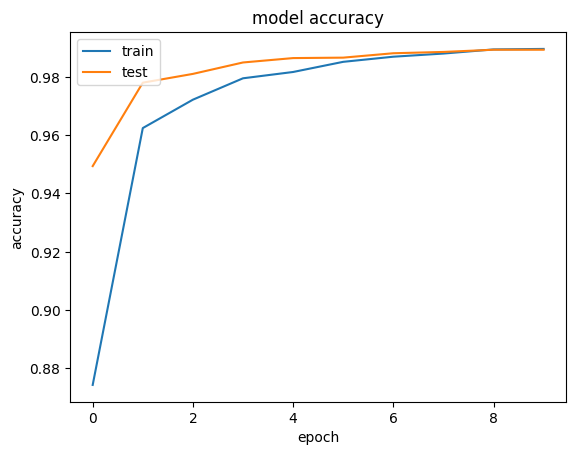

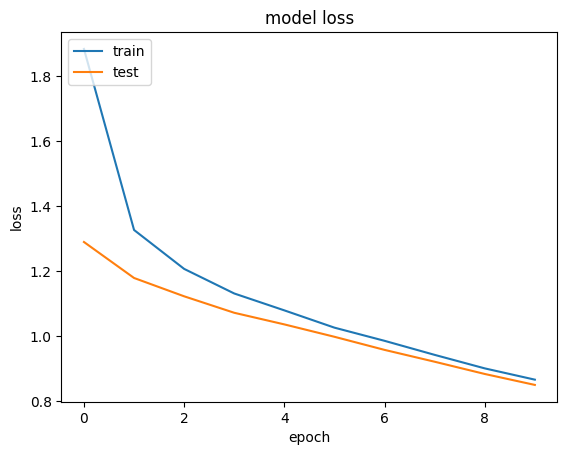

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 747ms/step - categorical_accuracy: 0.9849 - loss: 0.8650 - top_3_accuracy: 0.9988
Test-set classification accuracy: 98.77%


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar las últimas 30 capas del modelo base
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Definir el callback de TensorBoard
#tensorboard = TensorBoard(log_dir=f'logs/{datetime.now().strftime("%Y%m%d-%H%M%S")}', histogram_freq=1)

# Continuar entrenando el modelo (fine-tuning)
#fine_tuning_checkpoint = ModelCheckpoint('D:/Downloads/plankton_fine_tuned_best.hdf5', monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(train_generator,
                    initial_epoch=starting_epoch+epochs_top_layers,
                    epochs=starting_epoch+epochs_top_layers+epochs_fine_tuning,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 11/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 51s 357ms/step - categorical_accuracy: 0.9916 - loss: 0.8389 - val_categorical_accuracy: 0.9896 - val_loss: 0.8325 - learning_rate: 1.0000e-05
Epoch 12/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 297ms/step - categorical_accuracy: 0.9917 - loss: 0.8237 - val_categorical_accuracy: 0.9898 - val_loss: 0.8197 - learning_rate: 1.0000e-05
Epoch 13/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - categorical_accuracy: 0.9919 - loss: 0.8094 - val_categorical_accuracy: 0.9901 - val_loss: 0.8077 - learning_rate: 1.0000e-05
Epoch 14/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 298ms/step - categorical_accuracy: 0.9915 - loss: 0.7942 - val_categorical_accuracy: 0.9904 - val_loss: 0.7946 - learning_rate: 1.0000e-05
Epoch 15/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 296ms/step - categorical_accuracy: 0.9926 - loss: 0.7824 - val_categorical_accuracy: 0.9905 - val_loss: 0.7825 - learning_rate: 1.0000e-05
Epoch 16/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 36s 297ms/step - categorical_accuracy: 

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - categorical_accuracy: 0.9875 - loss: 0.3774
Test-set classification accuracy: 99.11%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Mostrar el reporte de clasificación
print(report)

26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step
               precision    recall  f1-score   support

     Akashiwo       0.61      1.00      0.76        14
     Ceratium       0.94      0.97      0.96       233
 Cochlodinium       1.00      0.45      0.62        11
    Corethron       0.99      0.99      0.99      1024
Coscinodiscus       0.97      0.98      0.97       179
Cylindrotheca       1.00      0.99      1.00      3408
   Delphineis       0.95      0.98      0.96        83
    Dictyocha       0.99      0.99      0.99       388
    Dinobryon       0.99      0.99      0.99      1211
     Ephemera       0.99      0.97      0.98       102

     accuracy                           0.99      6653
    macro avg       0.94      0.93      0.92      6653
 weighted avg       0.99      0.99      0.99      6653



26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step


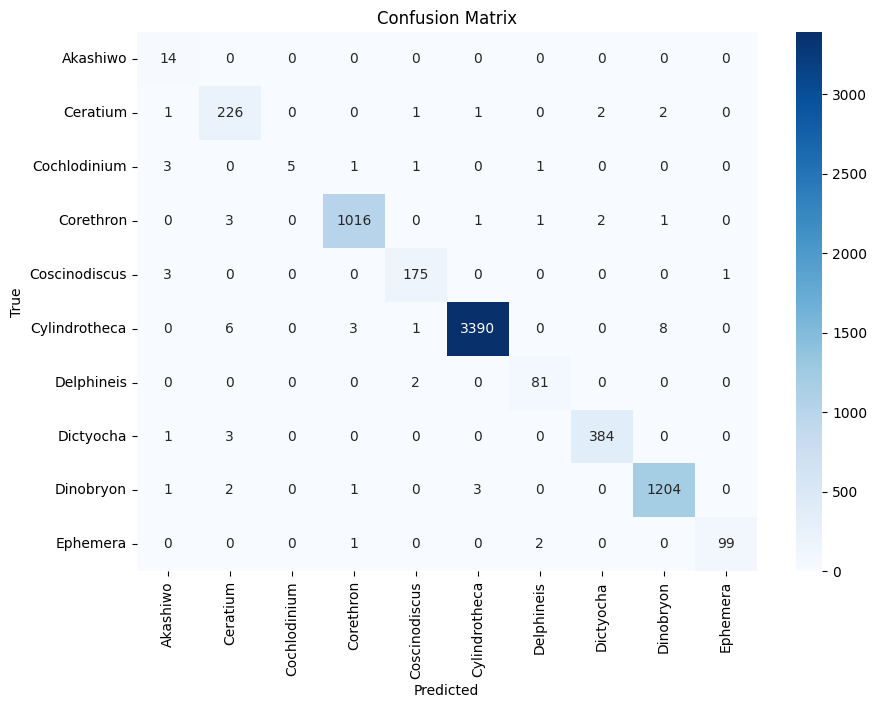

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("MobilenetV2_10.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Precisión para la carpeta 'akashiwo': 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━

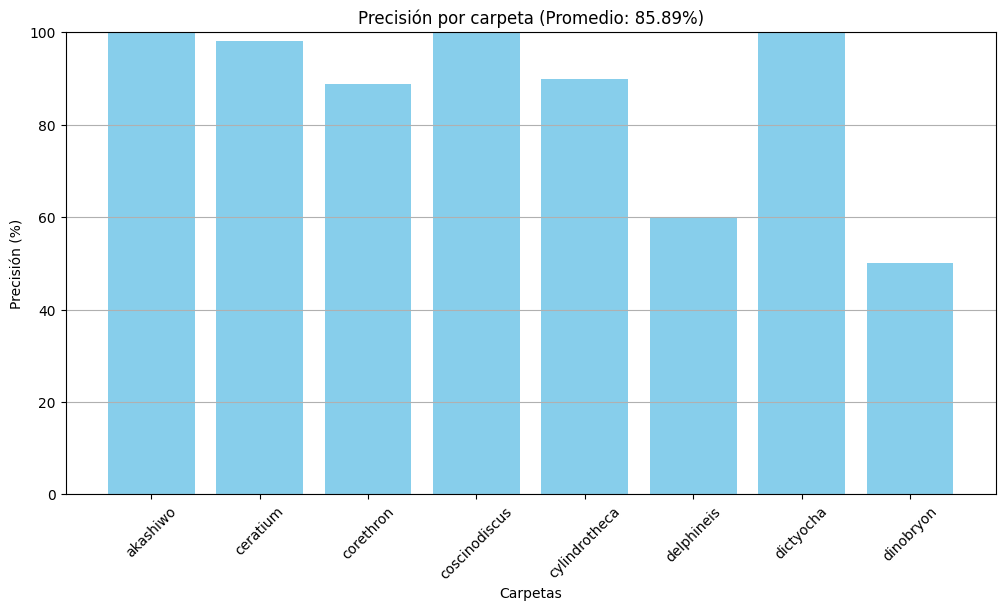

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
# model_path = '/ruta/a/tu/modelo.h5'
#model = tf.keras.models.load_model("/content/MobileNetV2_10.keras", custom_objects={'top_3_accuracy': top_3_accuracy})

# Ruta base de las carpetas de prueba
test_base_dir = '/content/planktonnet/test'

# Tamaño de las imágenes
target_size = (160, 160)

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Función para evaluar una carpeta de imágenes
def evaluate_folder(folder_path, true_label, model):
    if not os.path.exists(folder_path):
        print(f"Carpeta no encontrada: {folder_path}")
        return None  # O podrías devolver 0 o cualquier valor que indique que no se evaluó

    images = os.listdir(folder_path)
    correct_predictions = 0
    total_predictions = 0

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img_array = load_and_preprocess_image(img_path, target_size)
        predictions = model.predict(img_array)

        # Obtener los top 3 clases con mayor probabilidad
        top_3_indices = np.argsort(predictions[0])[::-1][:3]

        if true_label in top_3_indices:
            correct_predictions += 1
        total_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy

# Evaluar cada carpeta
carpetas_de_prueba = ['akashiwo', 'ceratium', 'cochlodinium', 'corethron', 'coscinodiscus', 'cylindrotheca', 'delphineis', 'dictyocha', 'dinobryon', 'ephemera']
true_labels = {
    'akashiwo': 0,
    'ceratium': 1,
    'cochlodinium': 2,
    'corethron': 3,
    'coscinodiscus': 4,
    'cylindrotheca': 5,
    'delphineis': 6,
    'dictyocha': 7,
    'dinobryon': 8,
    'ephemera': 9
}

precisiones = []

for carpeta in carpetas_de_prueba:
    carpeta_path = os.path.join(test_base_dir, carpeta)
    true_label = true_labels[carpeta]
    accuracy = evaluate_folder(carpeta_path, true_label, model)
    if accuracy is not None:
        precisiones.append((carpeta, accuracy))
        print(f"Precisión para la carpeta '{carpeta}': {accuracy:.2f}%")

# Calcular el promedio de las precisiones
accuracy_values = [item[1] for item in precisiones]
promedio = np.mean(accuracy_values)
print(f"Precisión promedio: {promedio:.2f}%")

# Graficar los resultados
carpetas = [item[0] for item in precisiones]

plt.figure(figsize=(12, 6))
plt.bar(carpetas, accuracy_values, color='skyblue')
plt.xlabel('Carpetas')
plt.ylabel('Precisión (%)')
plt.title(f'Precisión por carpeta (Promedio: {promedio:.2f}%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


## VGG16

In [ ]:
# Habilitar la política de mixed precision
from tensorflow.keras import mixed_precision

# Configurar la política de precisión mixta
mixed_precision.set_global_policy('mixed_float16')

print(f"Precision policy: {mixed_precision.global_policy()}")

Precision policy: <DTypePolicy "mixed_float16">


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
starting_epoch = 0
epochs_top_layers = 10
epochs_fine_tuning = 50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Directorios base para cada conjunto de datos
train_dir = '/content/dataset10/train'
val_dir = '/content/dataset10/val'
test_dir = '/content/dataset10/test'

input_shape = (224, 224)
batch_size =256

# Configuración del generador de datos con Data Augmentation extendido para el entrenamiento
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
    #brightness_range=[0.8, 1.5],
)

# Generador para datos de entrenamiento
train_generator = datagen_train.flow_from_directory(
    directory=train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

# Generador para datos de validación
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

# Generador para datos de prueba
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)


Found 29581 images belonging to 10 classes.
Found 6640 images belonging to 10 classes.
Found 6653 images belonging to 10 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
num_classes = train_generator.num_classes

print(class_names)
print(num_classes)

['Akashiwo', 'Ceratium', 'Cochlodinium', 'Corethron', 'Coscinodiscus', 'Cylindrotheca', 'Delphineis', 'Dictyocha', 'Dinobryon', 'Ephemera']
10


In [ ]:
cls_train = train_generator.classes
cls_validate = validation_generator.classes

In [ ]:
def top_3_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
# Definir la métrica personalizada
def top_3_accuracy(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)  # Convertir predicciones a float32
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)
class_weight = dict(enumerate(class_weight))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)

In [ ]:
# Crear el modelo base de VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularización L2
x = Dropout(0.3)(x)  # Dropout del 50%


# '/content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Entrenamiento'

# Actualizar la capa de salida
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
#    layer.trainable = False

# Congelar todas las capas de la base del modelo
# Descongelar las capas del bloque 4 en adelante
for layer in base_model.layers[:15]:  # Congelar las primeras 15 capas (bloques 1, 2, 3)
    layer.trainable = False
for layer in base_model.layers[15:]:  # Descongelar a partir del bloque 4
    layer.trainable = True

# Compilar el modelo
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_3_accuracy])

# Entrenar el modelo (solo las capas superiores)
history = model.fit(train_generator,
                    initial_epoch = starting_epoch,
                    epochs=epochs_top_layers+starting_epoch,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - categorical_accuracy: 0.8561 - loss: 1.7826 - top_3_accuracy: 0.9423 - val_categorical_accuracy: 0.9711 - val_loss: 0.7584 - val_top_3_accuracy: 0.9928 - learning_rate: 1.0000e-04
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 778ms/step - categorical_accuracy: 0.9652 - loss: 0.9532 - top_3_accuracy: 0.9890 - val_categorical_accuracy: 0.9843 - val_loss: 0.6730 - val_top_3_accuracy: 0.9958 - learning_rate: 1.0000e-04
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 778ms/step - categorical_accuracy: 0.9783 - loss: 0.7600 - top_3_accuracy: 0.9927 - val_categorical_accuracy: 0.9837 - val_loss: 0.6361 - val_top_3_accuracy: 0.9955 - learning_rate: 1.0000e-04
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 778ms/step - categorical_accuracy: 0.9847 - loss: 0.6649 - top_3_accuracy: 0.9950 - val_categorical_accuracy: 0.9890 - val_loss: 0.5892 - val_top_3_accuracy: 0.9974 - learning_rate: 1.0000e-04
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 779ms/step - categori

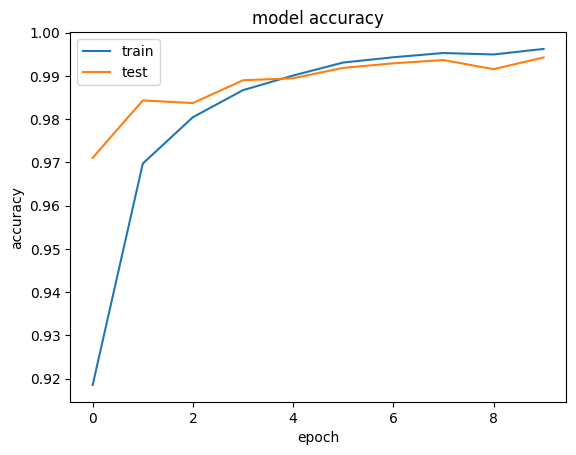

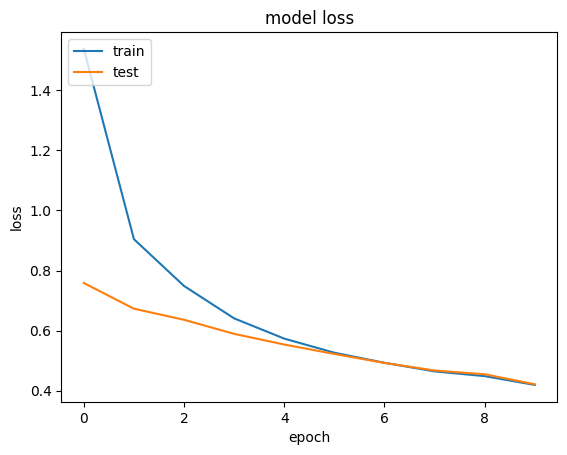

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - categorical_accuracy: 0.9886 - loss: 0.4507 - top_3_accuracy: 0.9979
Test-set classification accuracy: 99.23%


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar las últimas 30 capas del modelo base
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Definir el callback de TensorBoard
#tensorboard = TensorBoard(log_dir=f'logs/{datetime.now().strftime("%Y%m%d-%H%M%S")}', histogram_freq=1)

# Continuar entrenando el modelo (fine-tuning)
#fine_tuning_checkpoint = ModelCheckpoint('D:/Downloads/plankton_fine_tuned_best.hdf5', monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(train_generator,
                    initial_epoch=starting_epoch+epochs_top_layers,
                    epochs=starting_epoch+epochs_top_layers+epochs_fine_tuning,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 11/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 102s 819ms/step - categorical_accuracy: 0.9975 - loss: 0.4004 - val_categorical_accuracy: 0.9944 - val_loss: 0.4050 - learning_rate: 1.0000e-05
Epoch 12/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 94s 779ms/step - categorical_accuracy: 0.9981 - loss: 0.3822 - val_categorical_accuracy: 0.9949 - val_loss: 0.3854 - learning_rate: 1.0000e-05
Epoch 13/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 94s 778ms/step - categorical_accuracy: 0.9986 - loss: 0.3649 - val_categorical_accuracy: 0.9928 - val_loss: 0.3772 - learning_rate: 1.0000e-05
Epoch 14/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 778ms/step - categorical_accuracy: 0.9987 - loss: 0.3517 - val_categorical_accuracy: 0.9946 - val_loss: 0.3582 - learning_rate: 1.0000e-05
Epoch 15/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 94s 779ms/step - categorical_accuracy: 0.9992 - loss: 0.3371 - val_categorical_accuracy: 0.9949 - val_loss: 0.3459 - learning_rate: 1.0000e-05
Epoch 16/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 93s 778ms/step - categorical_accuracy:

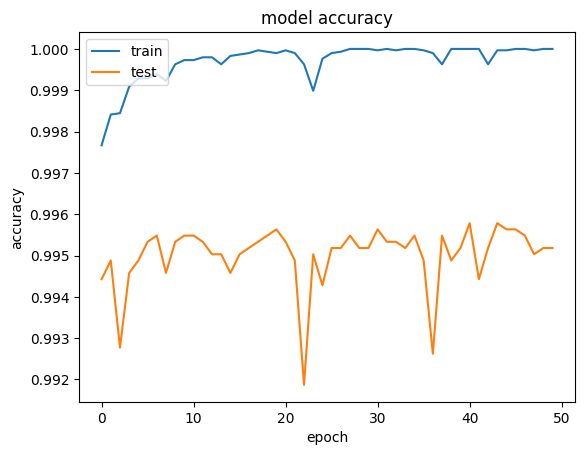

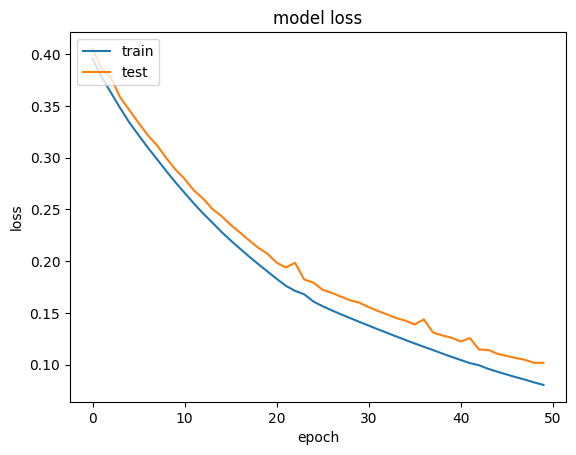

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 624ms/step - categorical_accuracy: 0.9917 - loss: 0.1411
Test-set classification accuracy: 99.47%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Mostrar el reporte de clasificación
print(report)

26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 610ms/step
               precision    recall  f1-score   support

     Akashiwo       0.87      0.93      0.90        14
     Ceratium       0.97      0.97      0.97       233
 Cochlodinium       1.00      0.64      0.78        11
    Corethron       1.00      1.00      1.00      1024
Coscinodiscus       0.96      0.99      0.97       179
Cylindrotheca       1.00      1.00      1.00      3408
   Delphineis       0.93      0.96      0.95        83
    Dictyocha       0.99      0.98      0.99       388
    Dinobryon       1.00      1.00      1.00      1211
     Ephemera       0.99      0.99      0.99       102

     accuracy                           0.99      6653
    macro avg       0.97      0.95      0.95      6653
 weighted avg       0.99      0.99      0.99      6653



26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 589ms/step


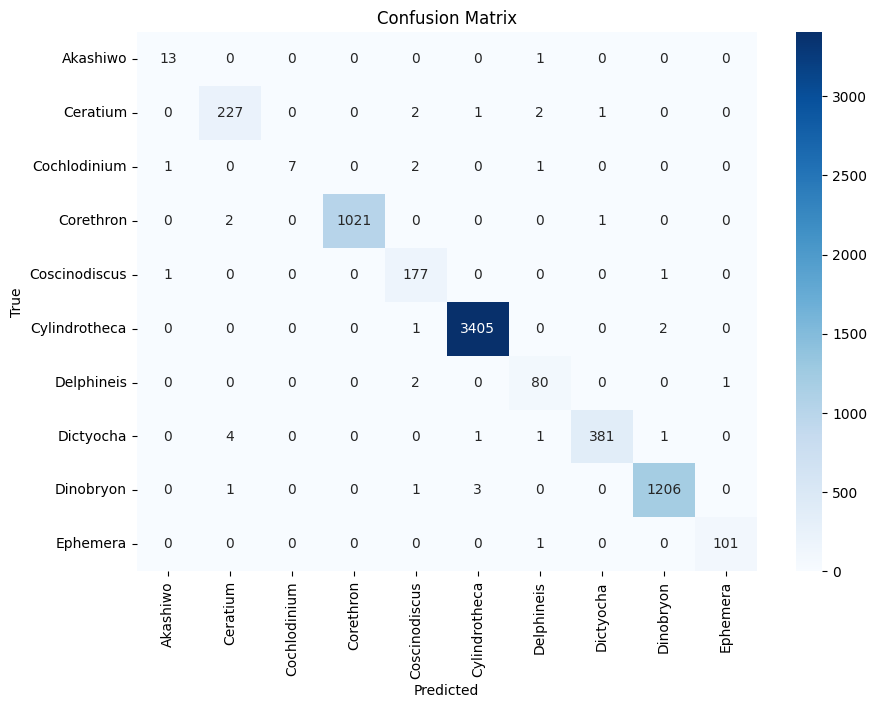

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("VGG16_10.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Precisión para la carpeta 'akashiwo': 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━

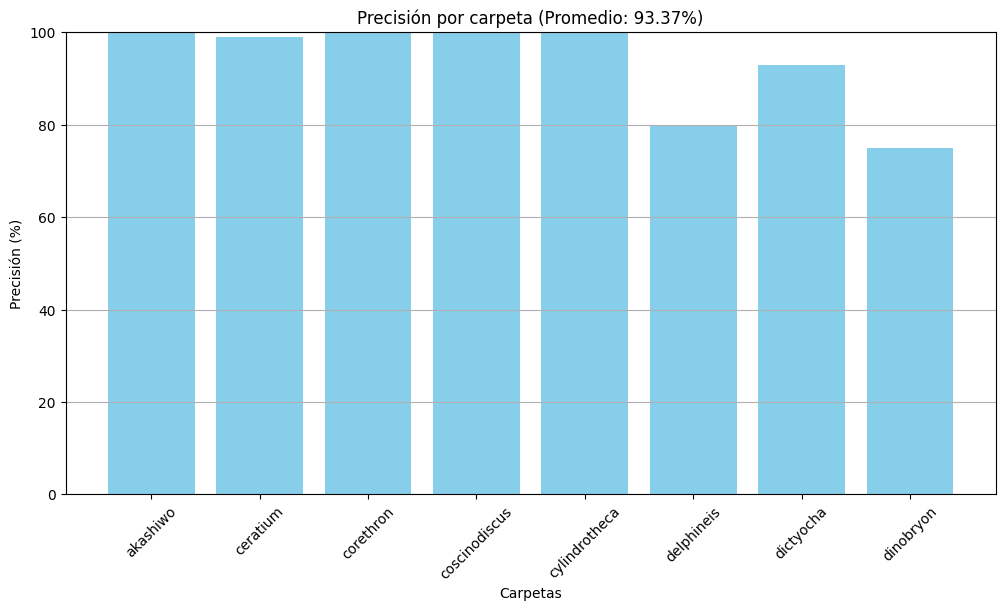

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
# model_path = '/ruta/a/tu/modelo.h5'
model = tf.keras.models.load_model("/content/VGG16_10.keras", custom_objects={'top_3_accuracy': top_3_accuracy})

# Ruta base de las carpetas de prueba
test_base_dir = '/content/planktonnet/test'

# Tamaño de las imágenes
target_size = (224, 224)

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Función para evaluar una carpeta de imágenes
def evaluate_folder(folder_path, true_label, model):
    if not os.path.exists(folder_path):
        print(f"Carpeta no encontrada: {folder_path}")
        return None  # O podrías devolver 0 o cualquier valor que indique que no se evaluó

    images = os.listdir(folder_path)
    correct_predictions = 0
    total_predictions = 0

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img_array = load_and_preprocess_image(img_path, target_size)
        predictions = model.predict(img_array)

        # Obtener los top 3 clases con mayor probabilidad
        top_3_indices = np.argsort(predictions[0])[::-1][:3]

        if true_label in top_3_indices:
            correct_predictions += 1
        total_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy

# Evaluar cada carpeta
carpetas_de_prueba = ['akashiwo', 'ceratium', 'cochlodinium', 'corethron', 'coscinodiscus', 'cylindrotheca', 'delphineis', 'dictyocha', 'dinobryon', 'ephemera']
true_labels = {
    'akashiwo': 0,
    'ceratium': 1,
    'cochlodinium': 2,
    'corethron': 3,
    'coscinodiscus': 4,
    'cylindrotheca': 5,
    'delphineis': 6,
    'dictyocha': 7,
    'dinobryon': 8,
    'ephemera': 9
}

precisiones = []

for carpeta in carpetas_de_prueba:
    carpeta_path = os.path.join(test_base_dir, carpeta)
    true_label = true_labels[carpeta]
    accuracy = evaluate_folder(carpeta_path, true_label, model)
    if accuracy is not None:
        precisiones.append((carpeta, accuracy))
        print(f"Precisión para la carpeta '{carpeta}': {accuracy:.2f}%")

# Calcular el promedio de las precisiones
accuracy_values = [item[1] for item in precisiones]
promedio = np.mean(accuracy_values)
print(f"Precisión promedio: {promedio:.2f}%")

# Graficar los resultados
carpetas = [item[0] for item in precisiones]

plt.figure(figsize=(12, 6))
plt.bar(carpetas, accuracy_values, color='skyblue')
plt.xlabel('Carpetas')
plt.ylabel('Precisión (%)')
plt.title(f'Precisión por carpeta (Promedio: {promedio:.2f}%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


## InceptionResnetV2

In [ ]:
# Habilitar la política de mixed precision
from tensorflow.keras import mixed_precision

# Configurar la política de precisión mixta
mixed_precision.set_global_policy('mixed_float16')

print(f"Precision policy: {mixed_precision.global_policy()}")

Precision policy: <DTypePolicy "mixed_float16">


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
starting_epoch = 0
epochs_top_layers = 10
epochs_fine_tuning = 50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# Directorios base para cada conjunto de datos
train_dir = '/content/dataset10/train'
val_dir = '/content/dataset10/val'
test_dir = '/content/dataset10/test'

input_shape = (299, 299)
batch_size = 256

# Configuración del generador de datos con Data Augmentation extendido para el entrenamiento
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #rotation_range=360,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
    #brightness_range=[0.8, 1.5],
)

# Generador para datos de entrenamiento
train_generator = datagen_train.flow_from_directory(
    directory=train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

# Generador para datos de validación
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

# Generador para datos de prueba
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb'
)

Found 29581 images belonging to 10 classes.
Found 6640 images belonging to 10 classes.
Found 6653 images belonging to 10 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
num_classes = train_generator.num_classes

print(class_names)
print(num_classes)

['Akashiwo', 'Ceratium', 'Cochlodinium', 'Corethron', 'Coscinodiscus', 'Cylindrotheca', 'Delphineis', 'Dictyocha', 'Dinobryon', 'Ephemera']
10


In [ ]:
cls_train = train_generator.classes
cls_validate = validation_generator.classes

In [ ]:
def top_3_accuracy(y_true, y_pred):
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
# Definir la métrica personalizada
def top_3_accuracy(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)  # Convertir predicciones a float32
    return tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(cls_train),
                                    y=cls_train)
class_weight = dict(enumerate(class_weight))

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

In [ ]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)  # Regularización L2
x = Dropout(0.3)(x)  # Dropout del 50%


# '/content/drive/Shareddrives/Proyecto Terminal ANN Plankton/Plankton/Entrenamiento'

# Actualizar la capa de salida
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

#for layer in base_model.layers:
#    layer.trainable = False

# Freeze the stem and early Inception blocks (A and B)
for layer in base_model.layers[:249]:  # 249 is the index of the last layer in block B
    layer.trainable = False

# Unfreeze the later Inception blocks (C and reduction blocks)
for layer in base_model.layers[249:]:  # Unfreeze layers from block C onwards
    layer.trainable = True


# Compilar el modelo
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', top_3_accuracy])

# Entrenar el modelo (solo las capas superiores)
history = model.fit(train_generator,
                    initial_epoch = starting_epoch,
                    epochs=epochs_top_layers+starting_epoch,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


116/116 ━━━━━━━━━━━━━━━━━━━━ 695s 4s/step - categorical_accuracy: 0.7947 - loss: 2.4230 - top_3_accuracy: 0.8900 - val_categorical_accuracy: 0.9744 - val_loss: 1.2526 - val_top_3_accuracy: 0.9922 - learning_rate: 1.0000e-04
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9803 - loss: 1.3772 - top_3_accuracy: 0.9949 - val_categorical_accuracy: 0.9919 - val_loss: 1.1153 - val_top_3_accuracy: 0.9983 - learning_rate: 1.0000e-04
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9896 - loss: 1.1830 - top_3_accuracy: 0.9978 - val_categorical_accuracy: 0.9803 - val_loss: 1.1178 - val_top_3_accuracy: 0.9983 - learning_rate: 1.0000e-04
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9903 - loss: 1.0864 - top_3_accuracy: 0.9987 - val_categorical_accuracy: 0.9923 - val_loss: 0.9966 - val_top_3_accuracy: 0.9991 - learning_rate: 1.0000e-04
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accu

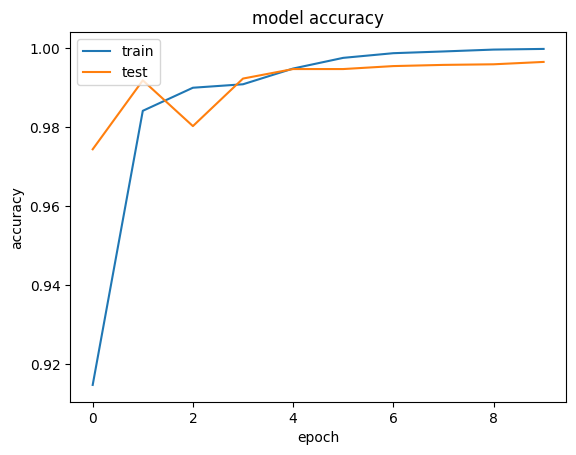

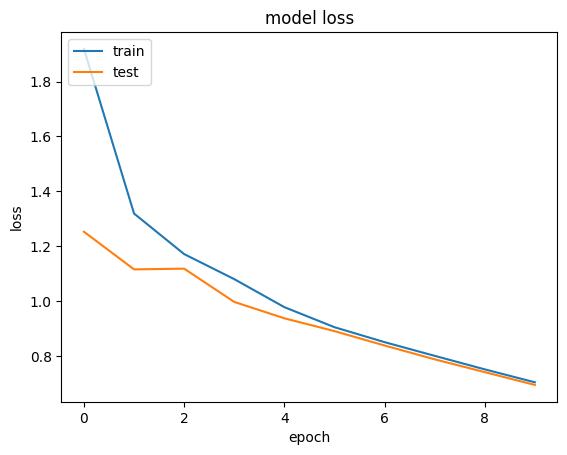

In [ ]:
plot_history(history)

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - categorical_accuracy: 0.9913 - loss: 0.7080 - top_3_accuracy: 0.9994
Test-set classification accuracy: 99.46%


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

# Descongelar las últimas 30 capas del modelo base
model.trainable = True

# Recompilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Definir el callback de TensorBoard
#tensorboard = TensorBoard(log_dir=f'logs/{datetime.now().strftime("%Y%m%d-%H%M%S")}', histogram_freq=1)

# Continuar entrenando el modelo (fine-tuning)
#fine_tuning_checkpoint = ModelCheckpoint('D:/Downloads/plankton_fine_tuned_best.hdf5', monitor='val_loss', save_best_only=True, mode='min')
history = model.fit(train_generator,
                    initial_epoch=starting_epoch+epochs_top_layers,
                    epochs=starting_epoch+epochs_top_layers+epochs_fine_tuning,
                    validation_data=validation_generator,
                    class_weight = class_weight,
                    callbacks = [early_stopping, reduce_lr],
                    shuffle=True)

Epoch 11/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - categorical_accuracy: 0.9998 - loss: 0.6657 - val_categorical_accuracy: 0.9964 - val_loss: 0.6397 - learning_rate: 1.0000e-05
Epoch 12/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9999 - loss: 0.6108 - val_categorical_accuracy: 0.9965 - val_loss: 0.5909 - learning_rate: 1.0000e-05
Epoch 13/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9999 - loss: 0.5636 - val_categorical_accuracy: 0.9974 - val_loss: 0.5483 - learning_rate: 1.0000e-05
Epoch 14/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9999 - loss: 0.5208 - val_categorical_accuracy: 0.9974 - val_loss: 0.5061 - learning_rate: 1.0000e-05
Epoch 15/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 0.9998 - loss: 0.4813 - val_categorical_accuracy: 0.9968 - val_loss: 0.4677 - learning_rate: 1.0000e-05
Epoch 16/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 313s 3s/step - categorical_accuracy: 1.0000 - los

In [ ]:
result = model.evaluate(test_generator)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - categorical_accuracy: 0.9931 - loss: 0.0412
Test-set classification accuracy: 99.55%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Mostrar el reporte de clasificación
print(report)

26/26 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step
               precision    recall  f1-score   support

     Akashiwo       0.87      0.93      0.90        14
     Ceratium       0.98      0.98      0.98       233
 Cochlodinium       1.00      0.64      0.78        11
    Corethron       1.00      1.00      1.00      1024
Coscinodiscus       0.97      0.99      0.98       179
Cylindrotheca       1.00      1.00      1.00      3408
   Delphineis       0.92      0.98      0.95        83
    Dictyocha       0.99      0.99      0.99       388
    Dinobryon       1.00      1.00      1.00      1211
     Ephemera       1.00      0.98      0.99       102

     accuracy                           1.00      6653
    macro avg       0.97      0.95      0.96      6653
 weighted avg       1.00      1.00      1.00      6653



26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 948ms/step


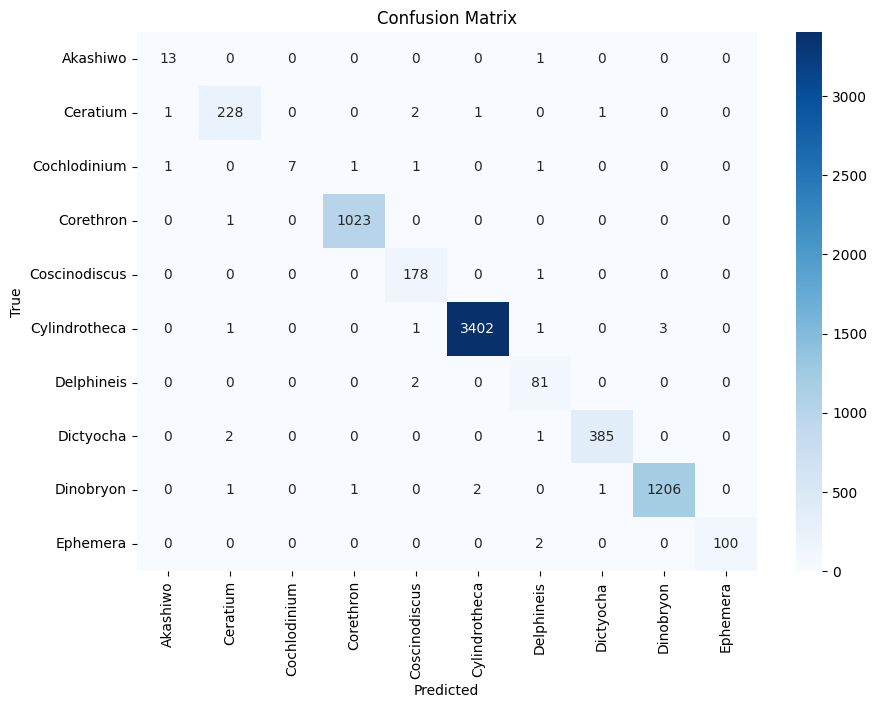

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre el conjunto de prueba
y_pred = model.predict(test_generator)

# Convertir las predicciones de probabilidades a etiquetas de clase
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas desde el generador
y_true = test_generator.classes

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Obtener los nombres de las clases desde el generador
class_names = list(test_generator.class_indices.keys())

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("InceptionResnetV2_10.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Precisión para la carpeta 'akashiwo': 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 

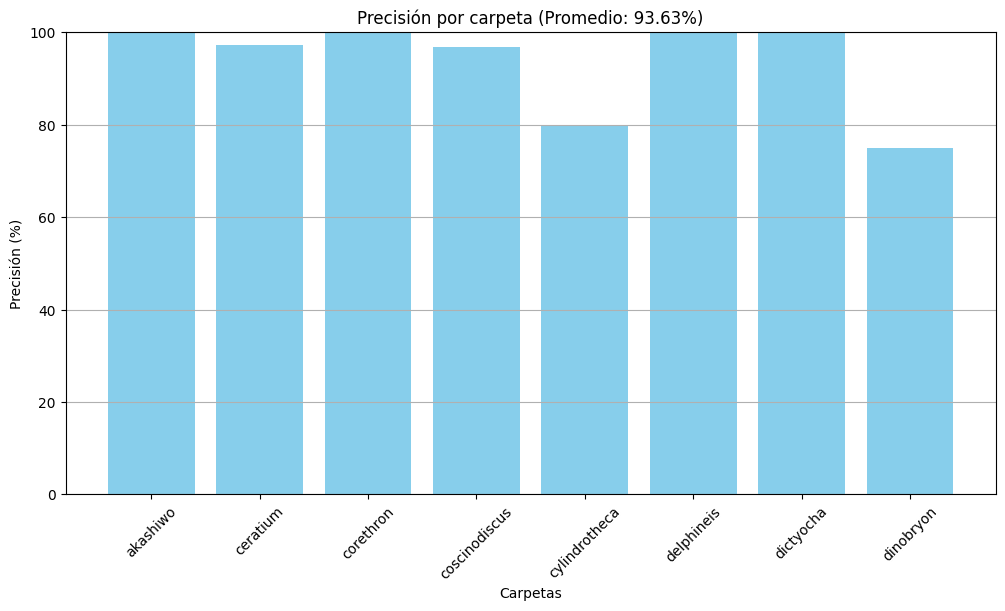

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Cargar el modelo entrenado
# model_path = '/ruta/a/tu/modelo.h5'
model = tf.keras.models.load_model("/content/InceptionResnetV2_10.keras", custom_objects={'top_3_accuracy': top_3_accuracy})

# Ruta base de las carpetas de prueba
test_base_dir = '/content/planktonnet/test'

# Tamaño de las imágenes
target_size = (299, 299)

# Función para cargar y preprocesar las imágenes
def load_and_preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Función para evaluar una carpeta de imágenes
def evaluate_folder(folder_path, true_label, model):
    if not os.path.exists(folder_path):
        print(f"Carpeta no encontrada: {folder_path}")
        return None  # O podrías devolver 0 o cualquier valor que indique que no se evaluó

    images = os.listdir(folder_path)
    correct_predictions = 0
    total_predictions = 0

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img_array = load_and_preprocess_image(img_path, target_size)
        predictions = model.predict(img_array)

        # Obtener los top 3 clases con mayor probabilidad
        top_3_indices = np.argsort(predictions[0])[::-1][:3]

        if true_label in top_3_indices:
            correct_predictions += 1
        total_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy

# Evaluar cada carpeta
carpetas_de_prueba = ['akashiwo', 'ceratium', 'cochlodinium', 'corethron', 'coscinodiscus', 'cylindrotheca', 'delphineis', 'dictyocha', 'dinobryon', 'ephemera']
true_labels = {
    'akashiwo': 0,
    'ceratium': 1,
    'cochlodinium': 2,
    'corethron': 3,
    'coscinodiscus': 4,
    'cylindrotheca': 5,
    'delphineis': 6,
    'dictyocha': 7,
    'dinobryon': 8,
    'ephemera': 9
}

precisiones = []

for carpeta in carpetas_de_prueba:
    carpeta_path = os.path.join(test_base_dir, carpeta)
    true_label = true_labels[carpeta]
    accuracy = evaluate_folder(carpeta_path, true_label, model)
    if accuracy is not None:
        precisiones.append((carpeta, accuracy))
        print(f"Precisión para la carpeta '{carpeta}': {accuracy:.2f}%")

# Calcular el promedio de las precisiones
accuracy_values = [item[1] for item in precisiones]
promedio = np.mean(accuracy_values)
print(f"Precisión promedio: {promedio:.2f}%")

# Graficar los resultados
carpetas = [item[0] for item in precisiones]

plt.figure(figsize=(12, 6))
plt.bar(carpetas, accuracy_values, color='skyblue')
plt.xlabel('Carpetas')
plt.ylabel('Precisión (%)')
plt.title(f'Precisión por carpeta (Promedio: {promedio:.2f}%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
